### Why Python?

- free, open source
- one platform for data pre-processing, visualization and analysis
- reproducible code
- large number of user-developed packages (eg. nibabel, nilearn)
- easy interaction with state-of-the art neuroimaging software (eg. FSL, ANTS)

### Types of MR Scans

<img src="../static/images/mr_scan_types.png" alt="Drawing" align="middle" width="500px"/>

For this tutorial, we'll be focusing on T1w and resting state fMRI scans.

### Neuroimaging File Formats

|Format Name | File Extension | Origin |
|---|---|---|
| Analyze | .img/.hdr | Analyze Software, Mayo Clinic |
| DICOM | none | ACR/NEMA Consortium |
| NIfTI | .nii or .img/.hdr | Neuroimaging Informatics Technology Initiative |
| MINC | .mnc | Montreal Neurological Institute |
| NRRD | .nrrd | |

<img src="../static/images/dicom_to_nifti.png" alt="Drawing" align="middle" width="300px"/>

From the MRI scanner, images are initially collected in the DICOM format and can be converted to NIfTI using [dcm2niix](https://github.com/rordenlab/dcm2niix).

### Intro to NIfTI

NIfTI is one of the most common file formats for storing neuroimaging data. We'll cover a few details to get started working with them. If you're interested in learning more about NIfTI images, we highly recommend [this blog post about the NIfTI format](http://brainder.org/2012/09/23/the-nifti-file-format/).

### Reading NIfTI Images

[NiBabel](http://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data. To learn more about how NiBabel handles NIfTIs, check out the [Working with NIfTI images](http://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation.

In [2]:
import nibabel as nib

First, use the `load()` function to create a NiBabel image object from a NIfTI file. We'll load in a T1w image from the dataset we'll be using for this tutorial.

In [3]:
t1_img = nib.load('../data/ds000030/sub-10788/anat/sub-10788_T1w.nii.gz')

There are three main components of a NIfTI image:

#### 1. [Header](http://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image, such as image dimensions, data type, etc.

In [4]:
nii_hdr = t1_img.header

You can easily access specific metadata from the NiBabel image header object through dictionary keys.

In [5]:
nii_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

**EXERCISE** Extract the value of `pixdim` from `nii_hdr`.

In [6]:
nii_hdr['pixdim']

array([1.       , 1.0000036, 1.       , 1.       , 2.53     , 1.       ,
       1.       , 1.       ], dtype=float32)

#### 2. Data

The data is a multidimensional array representing the image data.

In [28]:
nii_data = t1_img.get_data()
nii_data

array([[[12., 25., 17., ...,  2.,  0.,  0.],
        [ 4., 21., 13., ...,  3.,  3.,  0.],
        [24., 25., 17., ...,  2.,  2.,  0.],
        ...,
        [ 2.,  7.,  2., ...,  2.,  3.,  0.],
        [ 3.,  1.,  0., ...,  0.,  3.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[42., 21., 25., ...,  2.,  1.,  0.],
        [46., 23.,  7., ...,  0.,  4.,  0.],
        [10., 13., 31., ...,  2.,  1.,  0.],
        ...,
        [ 4.,  3.,  2., ...,  0.,  2.,  0.],
        [ 1.,  2.,  3., ...,  4.,  4.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[12., 11., 19., ...,  2.,  3.,  0.],
        [ 6.,  3., 15., ...,  1.,  2.,  0.],
        [15., 13., 11., ...,  1.,  1.,  0.],
        ...,
        [ 5.,  4.,  5., ...,  1.,  0.,  0.],
        [ 3.,  0.,  2., ...,  1.,  2.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 7., 20., 10., ...,  2.,  0.,  0.],
        [19., 10., 15., ...,  1.,  0.,  0.],
        [27., 12.,  9., ...,  0.,  0.,  0.

**EXERCISE** What are the dimensions of `nii_data`?

In [8]:
nii_data.shape

(176, 256, 256)

The shape of the data always has at least 3 dimensions (X, Y, and Z) and sometimes T (time). This T1w image has 3 dimensions. The brain was scanned in 176 slices with a resolution of 256 x 256 voxels per slice.

#### 3. [Affine](http://nipy.org/nibabel/coordinate_systems.html): tells the position of the image array data in a *reference space*

The affine array tells the position of the image array data in a *reference space*. It translates between data-space and world-space. We'll return back to this concept in a few cells.

In [9]:
nii_affine = t1_img.affine
nii_affine

array([[ 9.99526918e-01,  2.09424105e-02, -2.26823036e-02,
        -8.52145233e+01],
       [-2.09370945e-02,  9.99780655e-01,  4.75118955e-04,
        -1.12971115e+02],
       [ 2.26873625e-02,  7.35390060e-09,  9.99742627e-01,
        -1.50490341e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

#### Explore

**EXERCISE** Explore some of the other methods that can be called on the NIfTI image. Can you get the dimensions of the image? The data type?

In [10]:
t1_img.get_data_dtype()

dtype('<f4')

The data type of an image controls the range of possible intensities. As the number of possible values increases, the size of the image also increases.

| Data Type | Range | Number of Values |
|---|---|---|
| uint8 | 0, 255 | 256 |
| uint16 | -128, 127 | 256 |
| uint 16 | 0, 2^16 | 2^16 |
| int16 | -2^15, 2^15 | 2^16 |
| float16 | ~-2^16, ~2^16 | >>2^16 |

### Working With Image Data

#### Slicing

n-dimensional images are just stacks of numpy arrays.  Each value in the array is assigned to an x, y or z coordinate.  
You'll recall our example T1w image is a 3D image with dimensions $176 \times 256 \times 256$.

**EXERCISE** Select the central slice. eg(`nii_data[x, y, z]`)

In [55]:
central_slice = nii_data[nii_data.shape[0]//2 - 1, :, :]
central_slice

array([[42., 11., 28., ...,  0.,  2.,  0.],
       [20., 19., 12., ...,  0.,  2.,  0.],
       [22., 15.,  4., ...,  1.,  1.,  0.],
       ...,
       [ 5.,  0.,  0., ...,  1.,  1.,  0.],
       [ 9.,  0.,  0., ...,  2.,  3.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

Instead of indexing the data array, we can call the `slicer()` method on the NiBabel image object.

In [52]:
central_slice = t1_img.slicer[87:88, :, :]
central_slice.get_data()

array([[[42., 11., 28., ...,  0.,  2.,  0.],
        [20., 19., 12., ...,  0.,  2.,  0.],
        [22., 15.,  4., ...,  1.,  1.,  0.],
        ...,
        [ 5.,  0.,  0., ...,  1.,  1.,  0.],
        [ 9.,  0.,  0., ...,  2.,  3.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]], dtype=float32)

#### Visualizing
Let's visualize the central slice.

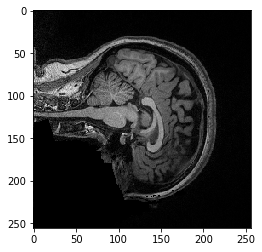

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(central_slice, cmap='gray')

You'll notice that the image is rotated. :( Don't worry, we can fix this!

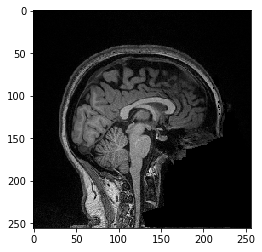

In [27]:
import numpy as np

rot_central_slice = np.rot90(central_slice, k=1)
plt.imshow(rot_central_slice, cmap='gray')

You'll notice that so far, we've only seen a sagittal slice. Lets visualize the sagittal, axial and coronal slices.

In [31]:
# function to display a row of slices
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        for ax in axes:
            ax.axis('off')

Text(0.5, 0.98, 'Center slice')

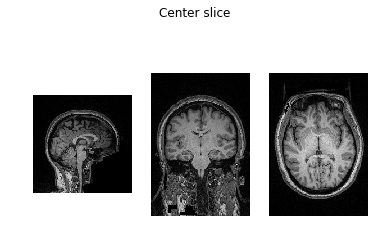

In [34]:
slice_0 = nii_data[87, :, :]
slice_1 = nii_data[:, 127, :]
slice_2 = nii_data[:, :, 127]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slice")

All this is fine but NiBabel makes it even easier to visualize all three planes. Call the `orthoview()` method on the NiBabel image object.

<OrthoSlicer3D: ../data/ds000030/sub-10788/anat/sub-10788_T1w.nii.gz (176, 256, 256)>

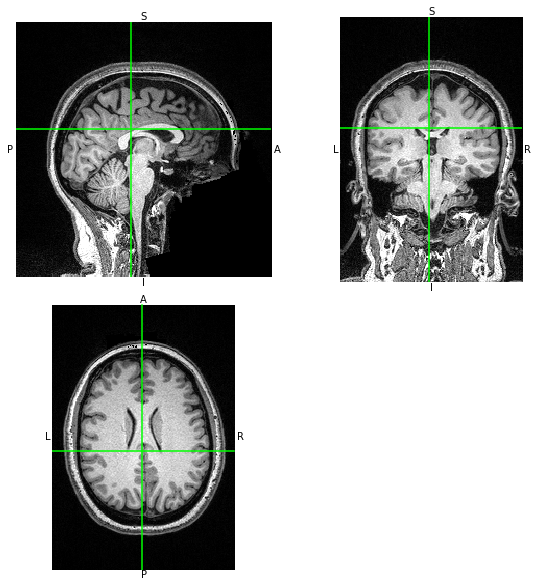

In [40]:
t1_img.orthoview()

### Coordinate Systems

In [54]:
nib.aff2axcodes(nii_affine)

('R', 'A', 'S')

In [55]:
nii_affine

array([[ 9.99526918e-01,  2.09424105e-02, -2.26823036e-02,
        -8.52145233e+01],
       [-2.09370945e-02,  9.99780655e-01,  4.75118955e-04,
        -1.12971115e+02],
       [ 2.26873625e-02,  7.35390060e-09,  9.99742627e-01,
        -1.50490341e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

You'll notice that the image is rotated. :(

#### Reshaping

NiBabel has a `reshape()` function for reshaping the data array. Let's say we want to convert this 3D array into a a 2D n_voxels * n_volumes) array.

In [ ]:
nii_data_2d = nii_data.reshape(np.prod(nii_data.shape[:-1]), nii_data.shape[-1])
nii_data_2d.shape

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=[18, 3])

n = 0
slice = 0

for i in range(6):
    axes[n].imshow(data[:, :, slice], cmap='gray')
    axes[n].set_xticks([])
    axes[n].set_yticks([])
    axes[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice +=4

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

Matplotlib's `imshow()` function displays 2D image data. 

We are looking at the subject's brain from the top with slice 0 being the lowest one and slice 20 being the highest one.

### Masks
Next, we will see how to segment the brain from the black background.

In [53]:
import scipy.ndimage as ndi

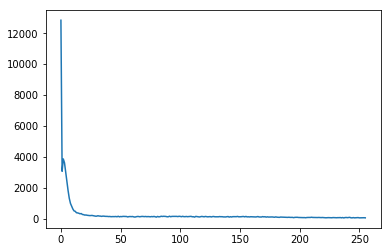

In [70]:
import scipy.ndimage as ndi

hist = ndi.histogram(central_slice, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

In [82]:
t1_mask = central_slice > 30

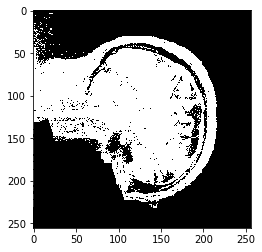

In [83]:
plt.imshow(t1_mask, cmap = 'gray')

In [ ]:
test = np.where(slice_3 > 80, slice_3, 0)
plt.imshow(test, cmap = 'gray')

### Writing NIfTI Images

Let's save the mask we just created to a file.

In [ ]:
img_mask = nib.Nifti1Image(test, nii_affine, nii_hdr)

In [80]:
img_mask.to_filename('../data/test_mask.nii.gz')

NameError: name 'img_mask' is not defined